In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def evaluate(d):
    mse_f = np.mean(d**2)
    mae_f = np.mean(abs(d))
    rmse_f = np.sqrt(mse_f)
    print("MAE:",mae_f)
    print("MSE:", mse_f)
    print("RMSE:", rmse_f)

In [3]:
# import data
data_set = pd.read_csv('airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])


<AxesSubplot:xlabel='Month'>

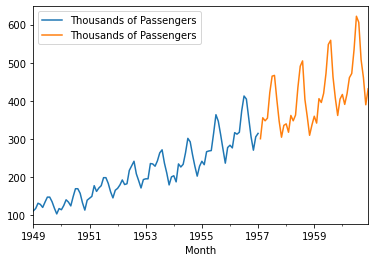

In [4]:
train, test = data_set[:'1957-01-01'].copy(), data_set['1957-01-02':].copy()
ax = train.plot()
test.plot(ax=ax)

### Exponential smoothing

In [5]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
import numpy as np

In [6]:
train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)

In [8]:
fit09 = SimpleExpSmoothing(train,initialization_method=None, initial_level=None).fit(smoothing_level=0.9,optimized=False)
test['SES09'] = fit09.forecast(len(test))

In [9]:
d = test['Thousands of Passengers'] - test['SES09']
evaluate(d)

MAE: 102.86369053329261
MSE: 16311.261527439045
RMSE: 127.71554927822628


In [10]:
fit001 = SimpleExpSmoothing(train['Thousands of Passengers']).fit(smoothing_level=0.01,optimized=False)
test['SES001'] = fit001.forecast(len(test))

In [11]:
d = test['Thousands of Passengers'] - test['SES001']
evaluate(d)

MAE: 228.18815961993138
MSE: 58021.101921831265
RMSE: 240.87569807232788


In [12]:
fitAuto = SimpleExpSmoothing(train['Thousands of Passengers']).fit()
test['SESauto'] = fitAuto.forecast(len(test))

In [13]:
d = test['Thousands of Passengers'] - test['SESauto']
evaluate(d)

MAE: 101.84852541197796
MSE: 16075.718287042111
RMSE: 126.79005594699495


### visualizing the three predictions

<AxesSubplot:xlabel='Month'>

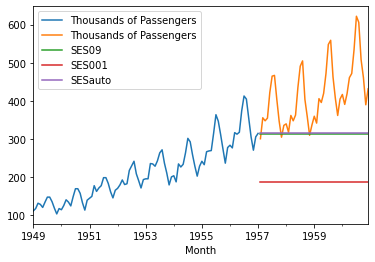

In [14]:
ax = train.plot()
test.plot(ax=ax)

### Holt's Linear method

In [15]:
fitHolt = Holt(train['Thousands of Passengers']).fit(smoothing_level = 0.2,smoothing_trend = 0.05)
test['Holt'] = fitHolt.forecast(len(test))

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='Month'>

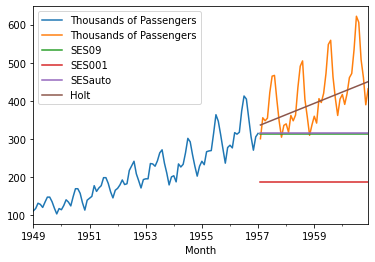

In [16]:
ax = train.plot()
test.plot(ax=ax)

### Holt-Winters' model

In [17]:
fitTES = ExponentialSmoothing(train['Thousands of Passengers'] ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
test['TES'] = fitTES.forecast(len(test))

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='Month'>

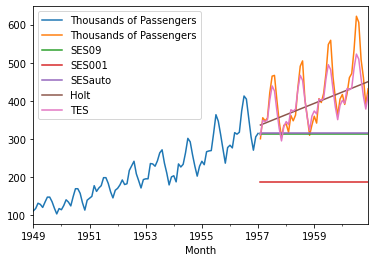

In [18]:
ax = train.plot()
test.plot(ax=ax)